# ***PRÁCTICO FINAL DE CIENCIA DE DATOS I - Coder House***
Estudiante: **Gonzalo Leonel Gramajo**  
Comisión: **74920**  
Documento: **40441349**  
Año: **2025**

____________________________________________________________________________________________
## **1. INTRODUCCIÓN Y OBJETIVO**

Este notebook corresponde al trabajo final del curso "Fundamentos de ciencia de datos" de Coder House. Está basado en un dataset de ventas de autos rescatado desde Keegle. Este conjunto de datos incluye todas las entradas de vehículos usados ​​dentro de los Estados Unidos en Craigslist.com.
Es importante resaltar que se cuenta con 426 mil lineas y el archivo ocupa 1.45 GB de almacenamiento, por lo que un archivo de tal tamaño no se peude subir a GitHub. Dado esto, el archivo .csv se puede encontrar disponible en Google Drive y obviamente, Kaggle.

### **Dataset**
Used Cars Dataset - Vehicles listings from Craigslist.org.  
Enlace web a Kaggle: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data  
Enlace web a Google Drive: https://drive.google.com/file/d/1uQ_YhqBimI46j5W-EgSwkjZvpFt87ejt/view?usp=sharing

### **Objetivo**
*Mediante el uso de algortimos de aprendizaje automático, lograr predecir el precio de venta de los vehículos según los datos de entrada odómetro (kilometraje), year (año de fabricación), transmission (trasmisión), fuel (combustible).*

**Pasos para lograr el objetivo:**
1.  **Introducción y Objetivo:** Definir el problema y el objetivo.
2.  **Importar Librerías:** Cargar las herramientas necesarias.
3.  **Carga de Datos:** Leer el dataset.
4.  **Hipótesis:** Plantear una hipótesis clara.
5.  **Análisis Exploratorio de Datos (EDA):** Entender los datos, distribuciones, valores faltantes y relaciones.
6.  **Feature Engineering (Ingeniería de Características):** Crear nuevas características si es relevante.
7.  **Preprocesamiento de Datos:** Preparar los datos para el modelo (manejo de categóricas, escalado).
8.  **División de Datos:** Separar en conjuntos de entrenamiento y prueba.
9.  **Construcción y Entrenamiento del Modelo:** Usar RandomForestClassifier.
10. **Evaluación del Modelo:** Medir el rendimiento con métricas adecuadas.
11. **Análisis de Importancia de Características:** Identificar qué variables son más influyentes.
12. **Conclusiones:** Interpretar los resultados y validar/refutar la hipótesis.

___________________________________________________________________________________________
## **2. IMPORTACIÓN DE MÓDULOS**

Para cargar todos los módulos (herramientas) que se necesitan en el despliegue de todo el análisis y entrenamiento, se debe ejecutar el siguiente código:

In [2]:
# Herramientas principales
import pandas as pd
import numpy as np
# Módulos de visualización
import matplotlib.pyplot as plt
import seaborn as sns

___________________________________________________________________________________________
## **3. CARGA DE DATOS**

Para conseguir un dataframe de los datos que contiene el .csv del dataset rescatado, se debe ejecutar el siguiente código:

In [3]:
file_path = './vehicles.csv' # ruta al archivo CSV
df = pd.read_csv(file_path) # leer el archivo CSV y conseguir un dataframe
df.head() # mostrar los primeros 5 valores

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


_____________________________________________________________________________
## **4. HIPÓTESIS**

Las siguientes hipótesis se plantean en marco al objetivo general de este análisis:  

1. **Los vehículos con valores en el odómetro más bajo se venden exponencialmente más caros.**  
*Esto es porque los vehículos con menos kilometraje (en teoría) deberían estar mas nuevos y en mejor estado que los autos que recorrieron más kilometros. En base a esto, se hipotetiza que la variación de este precio es de tipo exponencial.*  
  
2. **Los vehículos con año de fabricación menor, se venden exponencialmente más caros.**  
*Siguiendo con la premisa de que los autos más nuevos valen exponencialmente menos, se tratará de comprobar si esto también va en función del año de fabricación del vehículo y que correlación existe con la hipótesis anterior.*  

3. **Más del 50% de las publicaciones, son de vehículos con transmisión automática.**  
*Teniendo en cuenta la premisa que los automóviles con trasmisión automática son los más valuados, se verificará si esto es efectivamente así y que relación tiene con las 2 hipótesis anteriores.*

______________________________________________________________________________
## **5. ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA)**

1. Verificar la integridad de los datos en las columnas. Esto se hace para verificar que tan buena es la calidad del dataset. Keggle, la pagina web desde donde se descargo el datase, muestra un reporte de la integridad de los datos de cada columna, pero para complementar el análisis, se realiza el siguiente codigo:

In [4]:
# Función para calcular el porcentaje de integridad de cada columna
def column_integrity_simple(df):
    for col in df.columns:
        total_rows = len(df)
        non_null_count = df[col].notna().sum()
        integrity_percentage = (non_null_count / total_rows) * 100
        print(f"Columna {col}: {round(integrity_percentage, 2)}% -> {total_rows - non_null_count}/{total_rows}")

# Ejecutar el análisis de integridad simple
print("Integridad de los datos por columna:")
column_integrity_simple(df)

Integridad de los datos por columna:
Columna id: 100.0% -> 0/426880
Columna url: 100.0% -> 0/426880
Columna region: 100.0% -> 0/426880
Columna region_url: 100.0% -> 0/426880
Columna price: 100.0% -> 0/426880
Columna year: 99.72% -> 1205/426880
Columna manufacturer: 95.87% -> 17646/426880
Columna model: 98.76% -> 5277/426880
Columna condition: 59.21% -> 174104/426880
Columna cylinders: 58.38% -> 177678/426880
Columna fuel: 99.29% -> 3013/426880
Columna odometer: 98.97% -> 4400/426880
Columna title_status: 98.07% -> 8242/426880
Columna transmission: 99.4% -> 2556/426880
Columna VIN: 62.27% -> 161042/426880
Columna drive: 69.41% -> 130567/426880
Columna size: 28.23% -> 306361/426880
Columna type: 78.25% -> 92858/426880
Columna paint_color: 69.5% -> 130203/426880
Columna image_url: 99.98% -> 68/426880
Columna description: 99.98% -> 70/426880
Columna county: 0.0% -> 426880/426880
Columna state: 100.0% -> 0/426880
Columna lat: 98.47% -> 6549/426880
Columna long: 98.47% -> 6549/426880
Columna

2. Debido a que se muestra que no todas las columnas están completas, con el 100% de los datos, es interesante saber que cantidad de datos falta. Para esto se ejecuta la siguiente línea de código.

In [ ]:
df.isna().sum()

3. Si se quiere observar lo contrario, es decir, que datos son no nulos, además de que tipo de datos son y el uso de memoria del dataframe, conviene ejecutar la siguiente linea de código.

In [ ]:
df.info()

4. Por ultimo, para tener un pantallazo de alguno valores impotantes como la tendecnia central, dispersión y forma de la distribución de los datos, exluyendo los valores NaN, se debe ejecutar la siguiente linea de código.

In [ ]:
df.describe()

### Descripción de los campos

| # | CAMPO | TIPO DE DATO | DESCRIPCIÓN |
|---|-------|--------------|-------------|
| 1 | id | number | identificador del automovil publicado en la pagina web. |
| 2 | url | string | direccion web a la publicaciion del automovil en la pagina web. |
| 3 | region | string | estado de los estado unidos donde esta publicado el automovil segun Craiglist. |
| 4 | region_url | string | url pertencceinte exclusivamente a la region. |
| 5 | price | number | precio del automovil en unidades de la moneda dolar (USD). |
| 6 | year | number | año de fabricacion del automovil. |
| 7 | manufacturer | string |fabricante del vehiculo. |
| 8 | model | string | modelo del vehiculo segun la disignacion que le dio el fabricante. |
| 9 | condicion | string | esta es una evaluacion que se hace al publicar el automovil en la pagina web, pero es un dato subjetivo acorde al publicador. |
| 10 | cylinders | string | cantidad de cilindros que tiene el motor en su estructura y como estan configurados. |
| 11 | fuel | string | combustible que utiliza el vehiculo. |
| 12 | odometer | number | es la distancia recorrida todal del vehiculo en millas. |
| 13 | title_status | string | estado del titulo del vehiculo. No se conoce especificamente que significa, se averiguara mas al respecto. |
| 14 | transmission | string | tipo de trasmision con la que esta configurado el vehiculo. |
| 15 | VIN | string | numero de identificacion del vehiculo. Es parecido a la patente. |
| 16 | drive | string | tipo de traccion del vehiculo. Esto es, como se distribuye la energia mecanica a las ruedas. |
| 17 | size | number | se invertigara mas al respecto de que significa esta columna. |
| 18 | type | string | tipo o categoria del formato del vehiculo. |
| 19 | paint_color | string | color exterior del vehiculo. |
| 20 | image_url | string | link a la imagen del vehiculo publicado. |
| 21 | description | string | descripcion del vehiculo redactada por la persona que publico el vehiculo en la pagina web. |
| 22 | country | null | columna vacia ya que el valor siempre era estados unidos. |
| 23 | state | string | estado de los estados unidos donde se publica el vehiculo. No se almacena el nombre completo, sino la abreviatura. |
| 24 | lat | number | latitud de la ubicacion del vehiculo listado. |
| 25 | lon | number | longitud de la ubicacion del vehiculo listado. |
| 26 | posting_date | datetime | fecha de la publicacion del vehiculo. |

Debido a que existen datos que no se encuentran en el dataframe, se procede a completar los mismos con datos acordes al tipo que corresponde. Esto se hace con el fin de evitar errores en los proximos pasos (graficos, modelado). También es importante porque se puede completar una linea en vez de eliminarla totalmente y perder todos esos datos.  

Por otro lado, el dataframe tiene datos que no se usarán y es conveniente elimarlos para ahorrar espacio en memoria y agilizar el procesamiento. Si no fuesen muchos datos, esto tal vez no es necesario de realizar, a pesar de que se pierde prolijidad. Pero como estamos hablando de mas de un dataframe de más de 1 GB, se debe optimizar esto.

In [5]:
# Completamos los datos faltantes en las columnas de tipo object/string
columnas_editar = ("manufacturer", "model", "condition",
                   "cylinders", "fuel", "title_status",
                   "transmission", "drive", "size", "type",
                   "paint_color")
for columna in columnas_editar:
    df[columna] = df[columna].fillna("uknown")

# Completamos los datos faltantes en las columnas de tipo number
df["year"] = df["year"].fillna(df["year"].mean())
df["odometer"] = df["odometer"].fillna(df["odometer"].mean())

# Eliminamos columnas innecesarias
columnas_eliminar = ["url","region", "VIN", "county", "lat", "long", "image_url", "region_url", "posting_date"]
df.drop(columns=columnas_eliminar, axis=1, inplace=True)

# Mostrar cuántos datos faltantes quedan
print(df.isna().sum())

id               0
price            0
year             0
manufacturer     0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
title_status     0
transmission     0
drive            0
size             0
type             0
paint_color      0
description     70
state            0
dtype: int64


Hay columnas que no fueron completadas porque no es necesario hacerlo por el tipo de dato que representan. Por ejemplo, VIN es la patente o un identificador unico del vehoiculo. Sin embargo, no son datos que sean relevantes para la contrastación de la hipotesis y no serán usados en el análisis o entrenamiento. Como así tambien la ubicacion precisa de donde se realizo el posteo, es decir "lat" y "lon".  
Luego de estos cambios, el dataframe queda con la siguiente descripción:

In [ ]:
df.info()

### Contrastación de las hipótesis

#### Hipótesis 1:
*''Los vehículos con valores en el odómetro más bajo se venden exponencialmente más caros.''*

Primero, se puede visualizar los datos de precio contra el odometro para poder visualizar si a simple vista, la relacion es exponencial como se plantea en la hipótesis.

In [ ]:
# Se realiza el siguiente filtrado para poder eliminar un poco los outliers y los datos que no tienen sentido.
df_filtrado = df[
    (df["odometer"] < df["odometer"].quantile(0.98)) &
    (df["price"] < df["price"].quantile(0.98)) &
    (df["price"] > 1000)
]

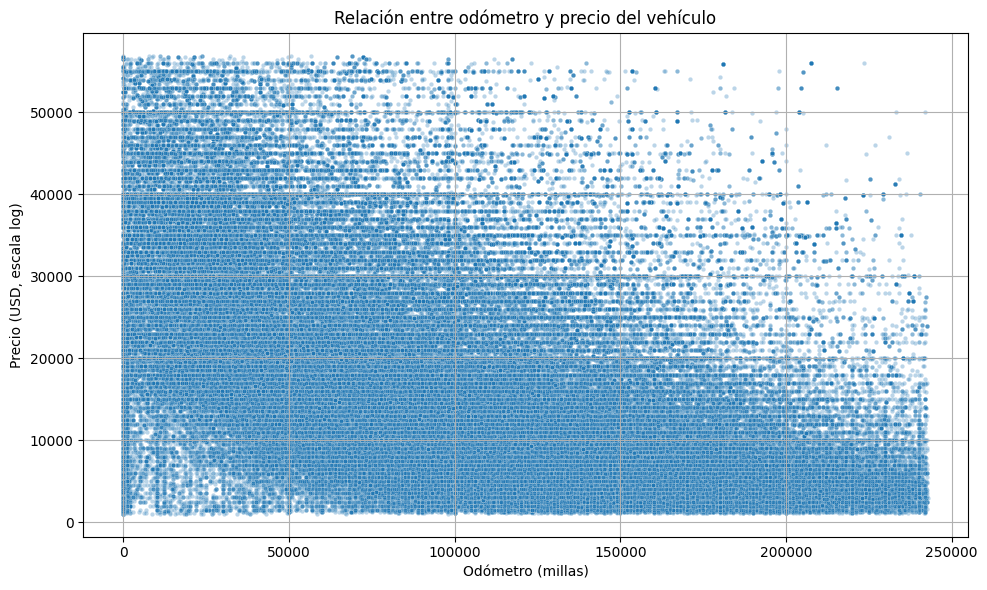

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x="odometer", y="price", alpha=0.3, s=10)
plt.title("Relación entre odómetro y precio del vehículo")
plt.xlabel("Odómetro (millas)")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

Por la cantidad inmensa de puntos (426.000 datos), parece una nebulosa y no se percibe claramente si la relación es exponencial, lineal o de otro tipo. Se puede afirmar que hay mucha dispersión de los datos.  
Desde ya, como **conclusión**, se puede afirmar que el odómetro solo NO explica el precio de forma clara ni de forma exponencial. Puede haber una tendencia débil, pero no es dominante.  
Sí se podría filtrar los datos por marca, año o modelo para mostrar una tendecnia menos general. Para observar esto, se debe ejecutar el siguiente codigo:

La marca con más publicaciones es: ford
Modelo de la marca con más publicaciones: f-150


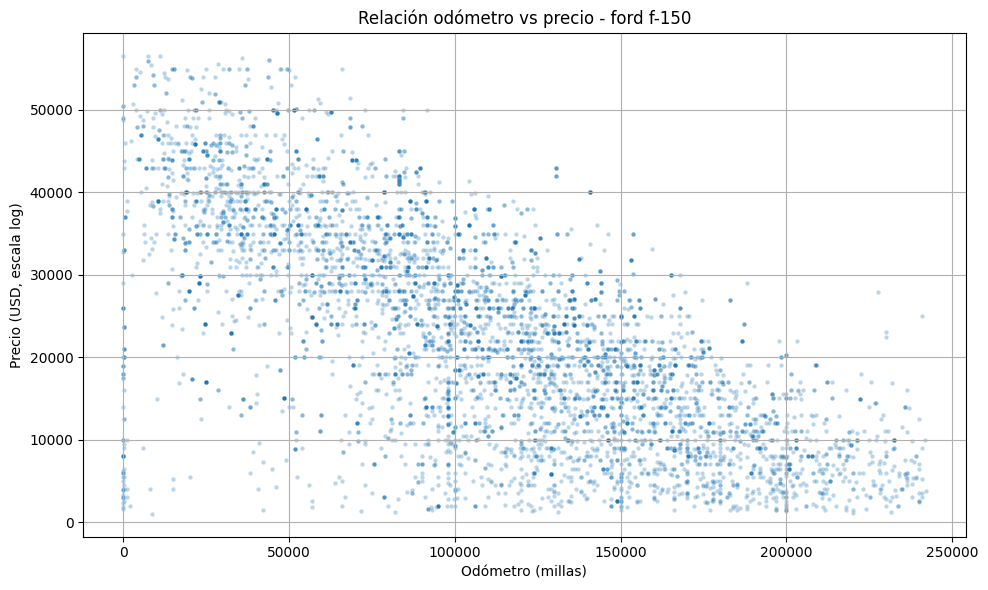

In [ ]:
# Contar las marcas
marca_mas_publicada = df_filtrado["manufacturer"].value_counts().idxmax()
print(f"La marca con más publicaciones es: {marca_mas_publicada}")

# Filtrar solo esa marca
df_marca = df_filtrado[df_filtrado["manufacturer"] == marca_mas_publicada]

# Contar los modelos
modelo_mas_publicado = df_marca["model"].value_counts().idxmax()
print(f"Modelo de la marca con más publicaciones: {modelo_mas_publicado}")

# Filtrar solo ese modelo
df_marca_modelo = df_marca[df_marca["model"] == modelo_mas_publicado]

# Mostrar la relación entre el precio y el odómetro para esa marca
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_marca_modelo, x="odometer", y="price", alpha=0.3, s=10)
plt.title(f"Relación odómetro vs precio - {marca_mas_publicada} {modelo_mas_publicado}")
plt.xlabel("Odómetro (millas)")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

Ahora si se puede ver una clara tendencia aunque hay una gran cantdad de outliers que podrían afectar el posterior modelado. La dispersión que se vé muestra mas bien una distribución lineal con pendiente negativa. Por lo tanto la hipóteisis queda refutada.

#### Hipótesis 2:
*''Los vehículos con año de fabricación menor, se venden exponencialmente más caros.''*

Primero, se puede visualizar los datos de precio contra los años para poder visualizar si a simple vista, la relacion es exponencial como se plantea en la hipótesis.

In [ ]:
# Se realiza el siguiente filtrado para poder eliminar un poco los outliers y los datos que no tienen sentido.
df_filtrado = df[
    (df["year"] < df["year"].quantile(0.99)) &
    (df["price"] < df["price"].quantile(0.99)) &
    (df["price"] > 1000)
]

La marca con más publicaciones es: ford
Modelo de la marca con más publicaciones: f-150


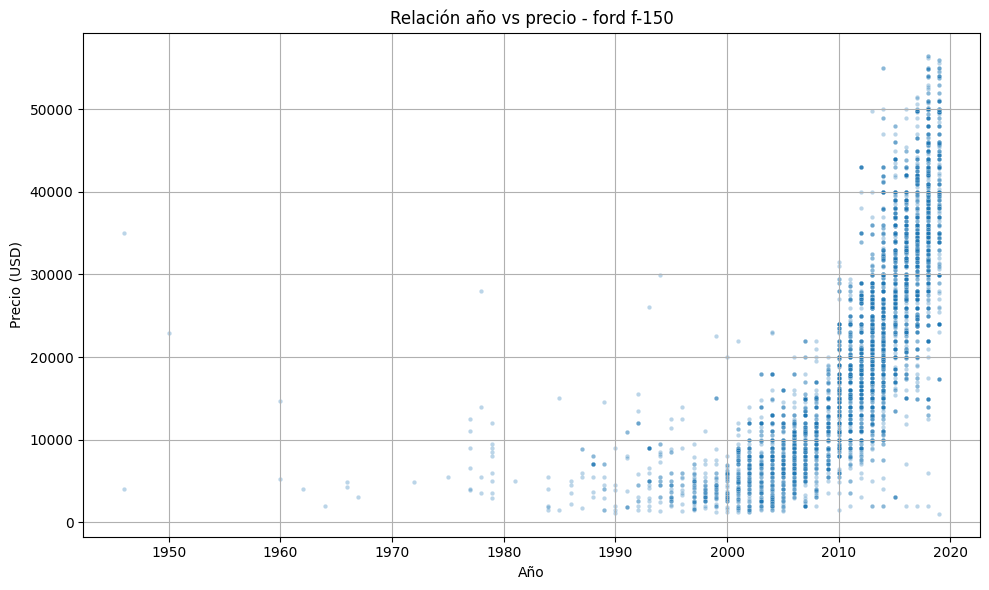

In [24]:
# Contar las marcas
marca_mas_publicada = df_filtrado["manufacturer"].value_counts().idxmax()
print(f"La marca con más publicaciones es: {marca_mas_publicada}")

# Filtrar solo esa marca
df_marca = df_filtrado[df_filtrado["manufacturer"] == marca_mas_publicada]

# Contar los modelos
modelo_mas_publicado = df_marca["model"].value_counts().idxmax()
print(f"Modelo de la marca con más publicaciones: {modelo_mas_publicado}")

# Filtrar solo ese modelo
df_marca_modelo = df_marca[df_marca["model"] == modelo_mas_publicado]

# Mostrar la relación entre el precio y el odómetro para esa marca
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_marca_modelo, x="year", y="price", alpha=0.3, s=10)
plt.title(f"Relación año vs precio - {marca_mas_publicada} {modelo_mas_publicado}")
plt.xlabel("Año")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

En este caso se nota que si se cumple lo que se plantea la hipótesis.

#### Hipótesis 3:
*''Más del 50% de las publicaciones, son de vehículos con transmisión automática.''*

Se puede visualizar los datos en gráfico de torta para saber facilmente si esto es cierto.

transmission
automatic    279321
other         50893
manual        22181
uknown         1700
Name: count, dtype: int64


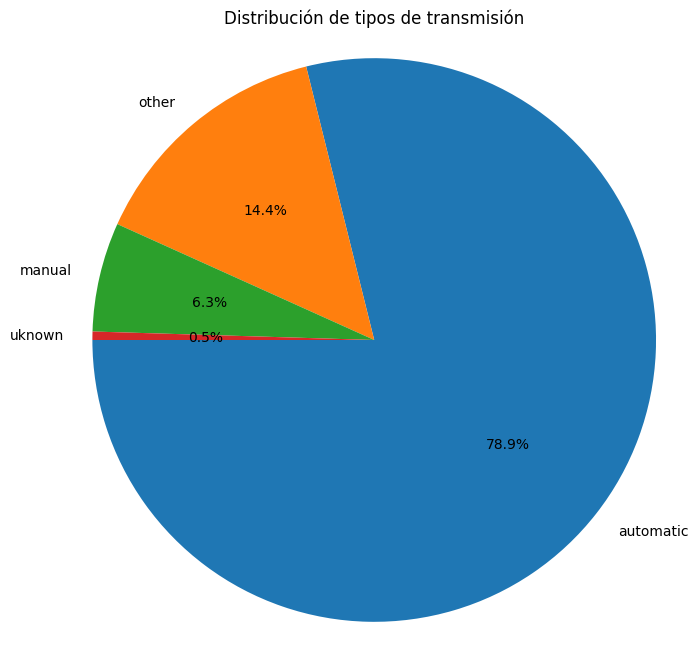

Porcentaje de vehículos automáticos: 78.88%


In [30]:
# Contar los valores de la columna "transmission"
conteo_transmision = df_filtrado["transmission"].value_counts()

# Mostrar los conteos (opcional, para ver qué hay)
print(conteo_transmision)

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    conteo_transmision,
    labels=conteo_transmision.index,
    autopct='%1.1f%%',  # Muestra el porcentaje
    startangle=180,       # Para que empiece arriba
    shadow=False
)
plt.title("Distribución de tipos de transmisión")
plt.axis('equal')  # Hace que el círculo sea redondo
plt.show()

# Además, calculamos el porcentaje de "automatic"
total = conteo_transmision.sum()
automaticos = conteo_transmision.get("automatic", 0)

porcentaje_automaticos = (automaticos / total) * 100
print(f"Porcentaje de vehículos automáticos: {porcentaje_automaticos:.2f}%")


En esta ocasión, tambien queda demostrada la hipótesis, ya que el 78,88% de los vehículos son con transmisión automática.

______________________________________________________________________________
## **6. FEATURE ENGINEERING (Ingeniería de características)**

Se crearán las siguientes nuevas caracterísitcas para poder lograr un entrenamiento factible que logre el objetivo:  

1. **Antigüedad del vehículo:** esta característica logra un valor que es más intuitivo que el año. A mayor edad, menor precio.
2. **Kilometraje promedio por año:** esta nueva característica da idea del uso intensivo. Un auto más antigüo pero poco usado puede valer más que uno nuevo con mucho kilometraje.
3. **Densidad de publicaciones por estado:** esto mide cuántos autos hay por estado. En base a esto se puede deducir como afecta la ley de oferta/demanda.
4. **Longitud del texto de descripción:** En ventas, una descripción larga a veces significa más detalle, más confianza del vendedor, por lo tanto esto podría afectar al precio de venta.

In [20]:
# Antigüedad del vehículo
df["vehicle_age"] = 2025 - df["year"]
# Kilometraje promedio por año
df["miles_per_year"] = df["odometer"] / df["vehicle_age"]
# Densidad de publicaciones por estado
state_counts = df["state"].value_counts().to_dict()
df["state_density"] = df["state"].map(state_counts)
# Longitud del texto de descripción
df["desc_length"] = df["description"].apply(lambda x: len(str(x)))

Una vez ejecutado este código, el dataframe queda como sigue:

In [21]:
df.info()
df.head()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              426880 non-null  int64  
 1   price           426880 non-null  int64  
 2   year            426880 non-null  float64
 3   manufacturer    426880 non-null  object 
 4   model           426880 non-null  object 
 5   condition       426880 non-null  object 
 6   cylinders       426880 non-null  object 
 7   fuel            426880 non-null  object 
 8   odometer        426880 non-null  float64
 9   title_status    426880 non-null  object 
 10  transmission    426880 non-null  object 
 11  drive           426880 non-null  object 
 12  size            426880 non-null  object 
 13  type            426880 non-null  object 
 14  paint_color     426880 non-null  object 
 15  description     426810 non-null  object 
 16  state           426880 non-null  object 
 17  vehicle_ag

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,drive,size,type,paint_color,description,state,vehicle_age,miles_per_year,state_density,desc_length
0,7222695916,6000,2011.235191,uknown,uknown,uknown,uknown,uknown,98043.331443,uknown,...,uknown,uknown,uknown,uknown,NaN,az,13.764809,7122.752857,8679,3
1,7218891961,11900,2011.235191,uknown,uknown,uknown,uknown,uknown,98043.331443,uknown,...,uknown,uknown,uknown,uknown,NaN,ar,13.764809,7122.752857,4038,3
2,7221797935,21000,2011.235191,uknown,uknown,uknown,uknown,uknown,98043.331443,uknown,...,uknown,uknown,uknown,uknown,NaN,fl,13.764809,7122.752857,28511,3
3,7222270760,1500,2011.235191,uknown,uknown,uknown,uknown,uknown,98043.331443,uknown,...,uknown,uknown,uknown,uknown,NaN,ma,13.764809,7122.752857,8174,3
4,7210384030,4900,2011.235191,uknown,uknown,uknown,uknown,uknown,98043.331443,uknown,...,uknown,uknown,uknown,uknown,NaN,nc,13.764809,7122.752857,15277,3


______________________________________________________________________________
## **7. PREPROCESAMIENTO DE DATOS**

______________________________________________________________________________
## **8. DIVISIÓN DE DATOS**

______________________________________________________________________________
## **9. CONSTRUCCIÓN Y ENTRENAMIENTO DEL MODELO**

______________________________________________________________________________
## **10. EVALUACIÓN DEL MODELO**

______________________________________________________________________________
## **11. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS**

______________________________________________________________________________
## **12. CONCLUSIONES**